In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
def combine_db_by_iso(iso, time, dbs, weights):
    v = 0
    for i in range(len(dbs)):
        try:
            v += list(dbs[i][(dbs[i]['TIME']==iso)][time])[0] * weights[i]
        except:
            v += 0
    return v

def combine_dbs_by_isoweights(dbs, weights):
    x = pd.concat(dbs)
    isos = np.insert(x['TIME'].unique(), 0, 'FLUENCE')
    times = x.columns[1:]
    y = []
    for t in times:
        temp = [t]
        for i in isos[1:]:  
            temp.append(combine_db_by_iso(i, t, dbs, weights))
        y.append(temp)
    z = pd.DataFrame(y, columns=isos)
    z['BUd'] = z['BUd'].cumsum()
    return z    

def db_slice_values(db, target_column, target_value):
    cols = db.columns
    t_array = []
    db1 = db[:1]
    db2 = db[-1:]
    x1 = db1[target_column].values[0]
    delta_x = db2[target_column].values[0] - x1
    x = target_value - x1
    for c in cols:
        if c == target_column:
            t_array.append(target_value)
        else:
            y1 = float(db1[c].values[0])
            y2 = float(db2[c].values[0])
            t_array.append(y1 + x*(y2-y1)/(delta_x))
    db.loc[-1] = t_array
    db.index =db.index + 1
    db.sort_index(inplace=True)
    return db

In [113]:
U235 = pd.read_csv('U235.csv')
U235.fillna(0, inplace=True)
U238 = pd.read_csv('U238.csv')
U238.fillna(0, inplace=True)
z = combine_dbs_by_isoweights([U235, U238], [0.0071, 0.9929])
z1 = z[(z['BUd'] > 5) & (z['BUd'] < 10)]

In [129]:
lower = 2
upper = 15
BU_range = range(lower, upper)
PU239 = np.zeros(len(BU_range))
PU240 = np.zeros(len(BU_range))
PU241 = np.zeros(len(BU_range))
PU242 = np.zeros(len(BU_range))
z1 = z[(z['BUd'] > lower) & (z['BUd'] < upper)]
for i in range(len(BU_range)):
    z2 = db_slice_values(z1, 'BUd', BU_range[i])
    PU239[i] = (z2['PU239'].values[0]/1000)
    PU240[i] = (z2['PU240'].values[0]/1000)
    PU241[i] = (z2['PU241'].values[0]/1000)
    PU242[i] = (z2['PU242'].values[0]/1000)
#print('PU239: ' + str(z2['PU239'].values[0]/1000))
#print('PU240: ' + str(z2['PU240'].values[0]/1000))
#print('PU241: ' + str(z2['PU241'].values[0]/1000))
#print('PU242: ' + str(z2['PU242'].values[0]/1000))      

c:\Users\rf846\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
c:\Users\rf846\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


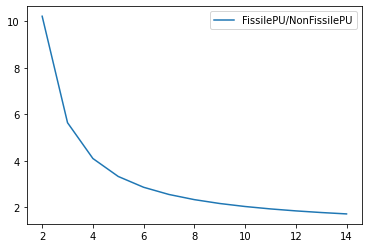

In [130]:
plt.plot(BU_range, (PU239+PU241)/(PU240+PU242), label='FissilePU/NonFissilePU')
#plt.plot(BU_range, PU240, label='PU240')
#plt.plot(BU_range, PU241, label='PU241')
#plt.plot(BU_range, PU242, label='PU242')
plt.legend()